In [227]:
import numpy as np
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from celluloid import Camera

import warnings
warnings.filterwarnings("ignore")

def calc_Q(G):
    m = sum(sum(G))
    inner_sum = 0
    for i in range(len(G)):
        A_i_i  = G[i,i]
        k_i_out = sum(G[i])
        k_i_in  = sum(G.T[i])
        inner_sum += (A_i_i - ((k_i_out*k_i_in)/m))

    return inner_sum / m
    
def G2E(G):
    E = G / sum(sum(G))
    # m = sum(sum(G))
    # E = np.zeros_like(G, dtype='float64')
    # e_i_j = 
    return E

def calc__Q(E):
    inner_sum = 0
    for i in range(len(E)):
        e_i_i  = E[i,i]
        a_i = sum(E[i])
        inner_sum += (e_i_i - a_i*a_i)
    return inner_sum

ex_graph = np.array([[1 ,0 ,0 ,1 ,1 ,0 ],[0 ,1 ,1 ,0 ,0 ,0 ],[0 ,0 ,0 ,0 ,1 ,1 ],[1 ,0 ,0 ,1 ,0 ,0 ],[1 ,0 ,0 ,1 ,0 ,0 ],[0 ,1 ,1 ,0 ,0 ,1 ]])
ex_labels = np.array([['aa','ab','ac','ad','ae','af'],['ba','bb','bc','bd','be','bf'],['ca','cb','cc','cd','ce','cf'],['da','db','dc','dd','de','df'],['ea','eb','ec','ed','ee','ef'],['fa','fb','fc','fd','fe','ff']])

In [228]:
def naive_greedy_itteration(G, Q, L):
    best_delta_Q = -1
    G_prime = np.array([])
    qG = np.zeros_like(G, dtype='float64')
    node_i = 0
    node_j = 0
    for i in range(len(G)):
        for j in range(len(G)):
            if i >= j:
                continue
            prefix = G[0:i,:]
            join = (G[i,:] + G[j,:]).reshape(1,len(G))
            interim = G[i+1:j,:]
            postfix = G[j+1:,:]
            if prefix.shape == (0,len(G)):
                cj = np.vstack((join, interim, postfix))
            elif interim.shape == (0,len(G)):
                cj = np.vstack((prefix, join, postfix))
            elif postfix.shape == (0,len(G)):
                cj = np.vstack((prefix, join, interim))
                
            prefix = cj[:,0:i]
            join = (cj[:,i] + cj[:,j]).reshape(len(cj),1)
            interim = cj[:,i+1:j]
            postfix = cj[:,j+1:]
            if prefix.shape == (len(cj),0):
                crj = np.hstack((join, interim, postfix))
            if interim.shape == (len(cj),0):
                crj = np.hstack((prefix, join, postfix))
            if postfix.shape == (len(cj),0):
                crj = np.hstack((prefix, join, interim))
            
            delta_Q = calc_Q(crj) - Q
            qG[i,j] = delta_Q
            qG[j,i] = delta_Q
            if delta_Q > best_delta_Q:
                best_delta_Q = delta_Q
                G_prime = crj
                best_i = i
                node_i = L[0][i][1]
                best_j = j
                node_j = L[0][j][1]

    L = np.delete(L, best_j, 0)
    L = np.delete(L, best_j, 1)
    H = np.zeros_like(G)
    H[best_i,:] = np.ones_like(G[best_i,:])
    H[:,best_i] = np.ones_like(G[:,best_i])
    H[best_j,:] = np.ones_like(G[best_j,:])
    H[:,best_j] = np.ones_like(G[:,best_j])

    return G_prime, L, H, qG

In [229]:
G_prime, L, H, qG = naive_greedy_itteration(ex_graph, calc_Q(ex_graph), ex_labels)

In [230]:
G = nx.from_numpy_array(ex_graph)

In [231]:
# modu = {}
modu = []
for E in G.edges():
    # modu[E[0],E[1]] = qG[E[0]][E[1]]
    modu += [qG[E[0]][E[1]]]

In [232]:
# nx.set_edge_attributes(G, modu, "modu")
# nx.get_edge_attributes(G, "modu")

In [233]:
cmap = cm.get_cmap('bwr', 100)
p = nx.spring_layout(G)

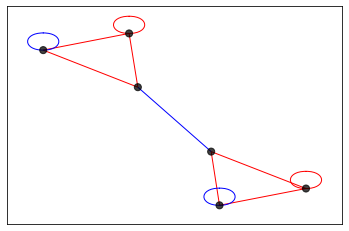

In [234]:
nx.draw_networkx_edges(G, pos=p, edgelist=G.edges(), width=list(nx.get_edge_attributes(G, "weight").values()), edge_color=[cmap(c*100) for c in modu], edge_cmap=cmap)
nx.draw_networkx_nodes(G, pos=p, node_size=50, node_color=['black' for node in G.nodes()], alpha=0.75)

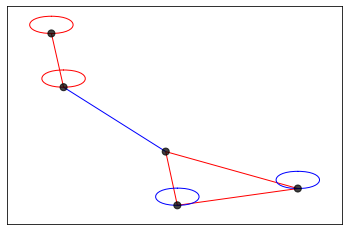

In [235]:
G_prime, L, H, qG = naive_greedy_itteration(ex_graph, calc_Q(ex_graph), ex_labels)
G = nx.from_numpy_array(G_prime)
# p = nx.spring_layout(G)
G_prime, L, H, qG = naive_greedy_itteration(G_prime, calc_Q(G_prime), L)
modu = []
for E in G.edges():
    modu += [qG[E[0]][E[1]]]
nx.draw_networkx_edges(G, pos=p, edgelist=G.edges(), width=list(nx.get_edge_attributes(G, "weight").values()), edge_color=[cmap(c*100) for c in modu], edge_cmap=cmap)
nx.draw_networkx_nodes(G, pos=p, node_size=50, node_color=['black' for node in G.nodes()], alpha=0.75)

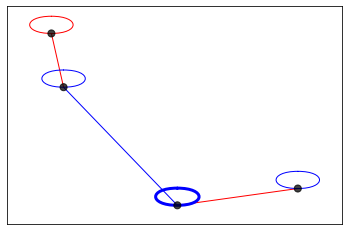

In [236]:
G = nx.from_numpy_array(G_prime)
# p = nx.spring_layout(G)
G_prime, L, H, qG = naive_greedy_itteration(G_prime, calc_Q(G_prime), L)
modu = []
for E in G.edges():
    modu += [qG[E[0]][E[1]]]
nx.draw_networkx_edges(G, pos=p, edgelist=G.edges(), width=list(nx.get_edge_attributes(G, "weight").values()), edge_color=[cmap(c*100) for c in modu], edge_cmap=cmap)
nx.draw_networkx_nodes(G, pos=p, node_size=50, node_color=['black' for node in G.nodes()], alpha=0.75)

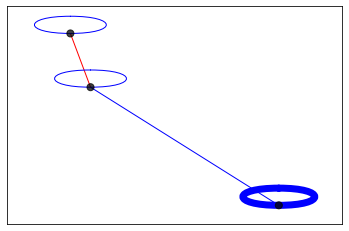

In [237]:
G = nx.from_numpy_array(G_prime)
# p = nx.spring_layout(G)
G_prime, L, H, qG = naive_greedy_itteration(G_prime, calc_Q(G_prime), L)
modu = []
for E in G.edges():
    modu += [qG[E[0]][E[1]]]
nx.draw_networkx_edges(G, pos=p, edgelist=G.edges(), width=list(nx.get_edge_attributes(G, "weight").values()), edge_color=[cmap(c*100) for c in modu], edge_cmap=cmap)
nx.draw_networkx_nodes(G, pos=p, node_size=50, node_color=['black' for node in G.nodes()], alpha=0.75)

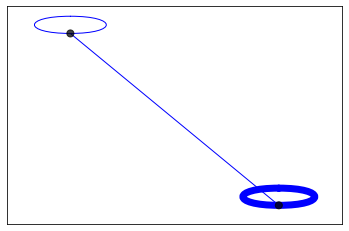

In [238]:
G = nx.from_numpy_array(G_prime)
# p = nx.spring_layout(G)
G_prime, L, H, qG = naive_greedy_itteration(G_prime, calc_Q(G_prime), L)
modu = []
for E in G.edges():
    modu += [qG[E[0]][E[1]]]
nx.draw_networkx_edges(G, pos=p, edgelist=G.edges(), width=list(nx.get_edge_attributes(G, "weight").values()), edge_color=[cmap(c*100) for c in modu], edge_cmap=cmap)
nx.draw_networkx_nodes(G, pos=p, node_size=50, node_color=['black' for node in G.nodes()], alpha=0.75)

In [252]:
def naive_greedy_itteration(G, Q):
    best_delta_Q = -1
    G_prime = np.array([])
    qG = np.zeros_like(G, dtype='float64')
    for i in range(len(G)):
        for j in range(len(G)):
            if i >= j:
                continue
            prefix = G[0:i,:]
            join = (G[i,:] + G[j,:]).reshape(1,len(G))
            interim = G[i+1:j,:]
            postfix = G[j+1:,:]
            if prefix.shape == (0,len(G)):
                cj = np.vstack((join, interim, postfix))
            elif interim.shape == (0,len(G)):
                cj = np.vstack((prefix, join, postfix))
            elif postfix.shape == (0,len(G)):
                cj = np.vstack((prefix, join, interim))
            prefix = cj[:,0:i]
            join = (cj[:,i] + cj[:,j]).reshape(len(cj),1)
            interim = cj[:,i+1:j]
            postfix = cj[:,j+1:]
            if prefix.shape == (len(cj),0):
                crj = np.hstack((join, interim, postfix))
            if interim.shape == (len(cj),0):
                crj = np.hstack((prefix, join, postfix))
            if postfix.shape == (len(cj),0):
                crj = np.hstack((prefix, join, interim))
            delta_Q = calc_Q(crj) - Q
            qG[i,j] = delta_Q
            qG[j,i] = delta_Q            
            if delta_Q > best_delta_Q:
                best_delta_Q = delta_Q
                G_prime = crj
    Q_ = Q + best_delta_Q
    return G_prime, Q_, qG

In [321]:
N = 50
np.random.seed(123)
b = np.random.randint(low=-1,high=1,size=(N,N)) / 10
G_ = (b + b.T)
Q_ = calc_Q(G_)

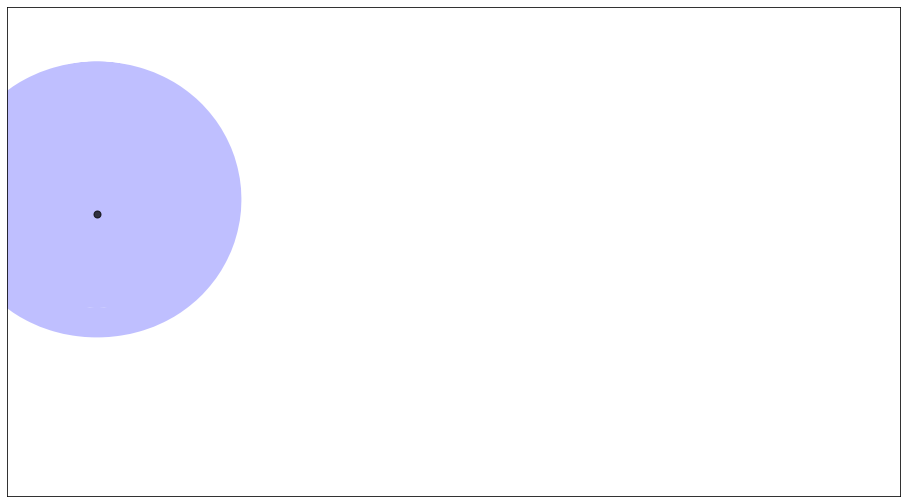

In [428]:
fig = plt.figure(figsize=(16,9))
camera = Camera(fig)

G_prime, Q_, qG = naive_greedy_itteration(G_, Q_)
G = nx.from_numpy_array(G_)
p = nx.spring_layout(G)
# G_prime, Q_, qG = naive_greedy_itteration(G_, Q_)
modu = []
for E in G.edges():
    modu += [qG[E[0]][E[1]]]
nx.draw_networkx_edges(G, pos=p, edgelist=G.edges(), width=list(nx.get_edge_attributes(G, "weight").values()), edge_color=[cmap(c*1000) for c in modu], edge_cmap=cmap, alpha=0.25)
nx.draw_networkx_nodes(G, pos=p, node_size=50, node_color=['black' for node in G.nodes()], alpha=0.75)
camera.snap()

while True:
    try:
        G = nx.from_numpy_array(G_prime)
        G_prime, Q_, qG = naive_greedy_itteration(G_prime, Q_)
        # G_prime, Q_, qG = naive_greedy_itteration(G_, Q_)
        modu = []
        for E in G.edges():
            modu += [qG[E[0]][E[1]]]
        nx.draw_networkx_edges(G, pos=p, edgelist=G.edges(), width=list(nx.get_edge_attributes(G, "weight").values()), edge_color=[cmap(c*1000) for c in modu], edge_cmap=cmap, alpha=0.25)
        nx.draw_networkx_nodes(G, pos=p, node_size=50, node_color=['black' for node in G.nodes()], alpha=0.75)
        camera.snap()
    except:
        break

animation = camera.animate()
animation.save('C:/OneDriveSchool_Personal/OneDrive - Umich/Math/Classes/Fall_2022/Capstone/Deliverables/prezi/test_50.gif', writer='imagemagick')

In [429]:
N = 100
np.random.seed(123)
b = np.random.randint(low=-1,high=1,size=(N,N)) / 10
G_ = (b + b.T)
Q_ = calc_Q(G_)

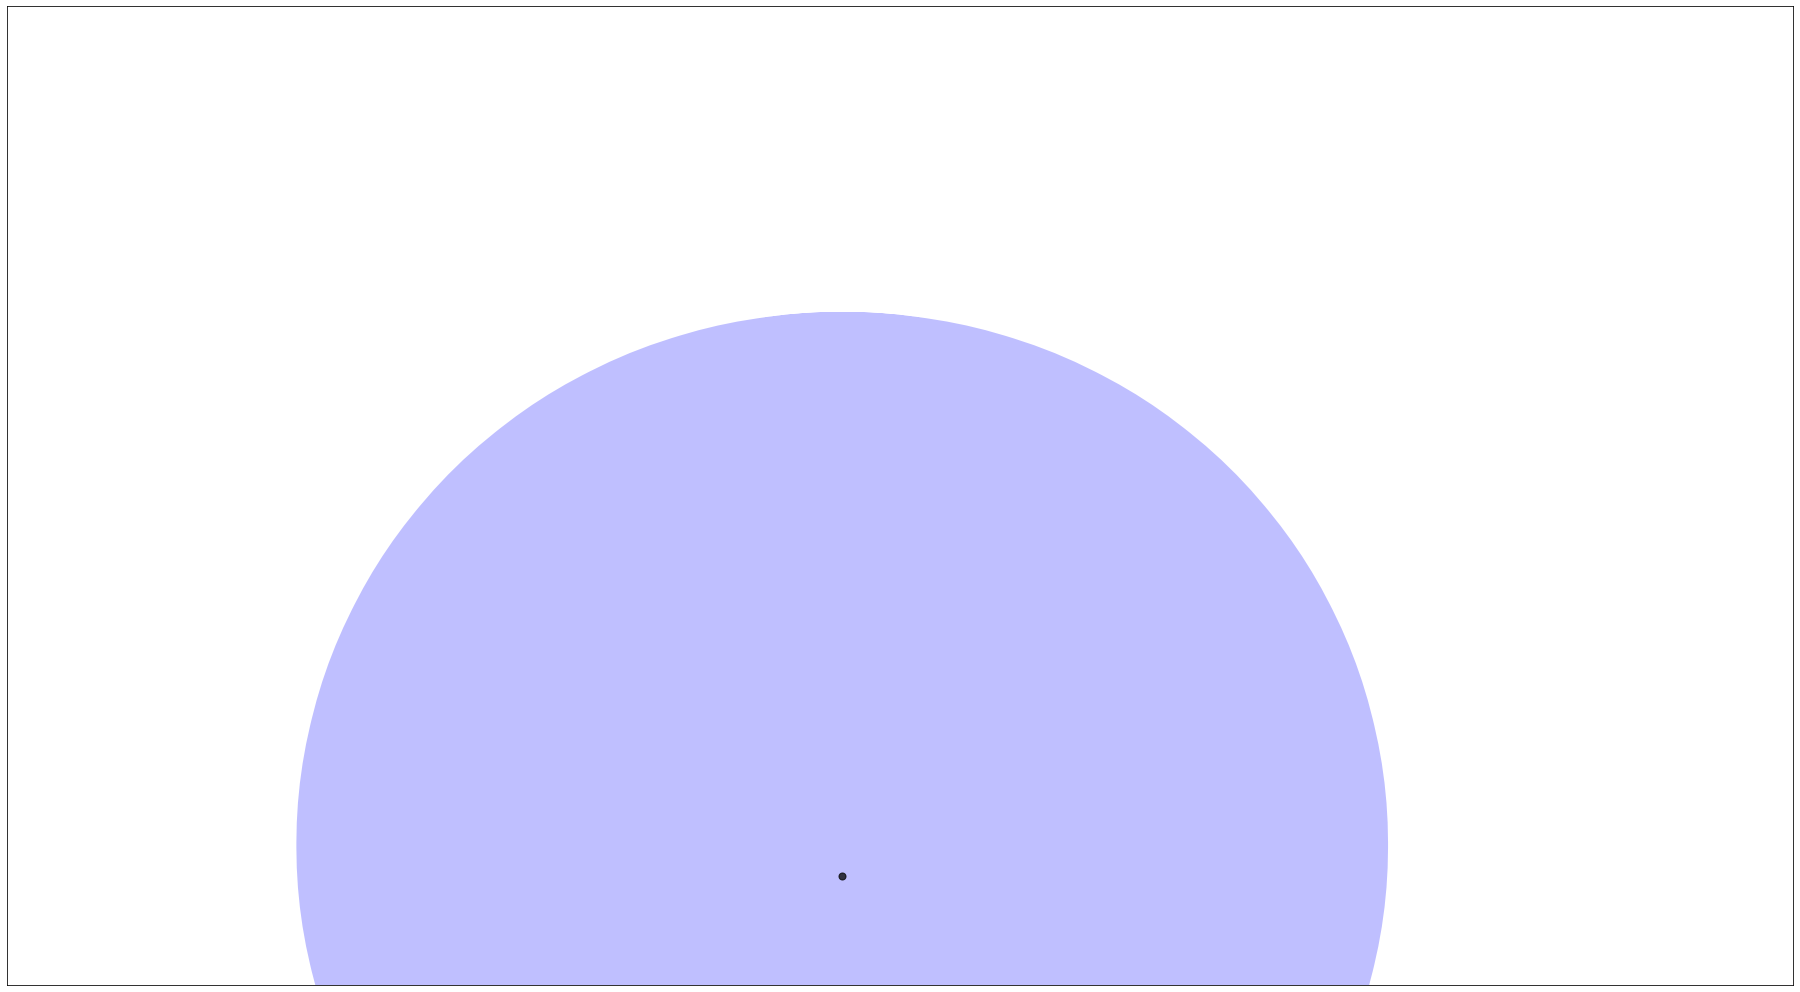

In [430]:
fig = plt.figure(figsize=(32,18))
camera = Camera(fig)

G_prime, Q_, qG = naive_greedy_itteration(G_, Q_)
G = nx.from_numpy_array(G_)
p = nx.spring_layout(G)
# G_prime, Q_, qG = naive_greedy_itteration(G_, Q_)
modu = []
for E in G.edges():
    modu += [qG[E[0]][E[1]]]
nx.draw_networkx_edges(G, pos=p, edgelist=G.edges(), width=list(nx.get_edge_attributes(G, "weight").values()), edge_color=[cmap(c*1000) for c in modu], edge_cmap=cmap, alpha=0.25)
nx.draw_networkx_nodes(G, pos=p, node_size=50, node_color=['black' for node in G.nodes()], alpha=0.75)
camera.snap()

while True:
    try:
        G = nx.from_numpy_array(G_prime)
        G_prime, Q_, qG = naive_greedy_itteration(G_prime, Q_)
        # G_prime, Q_, qG = naive_greedy_itteration(G_, Q_)
        modu = []
        for E in G.edges():
            modu += [qG[E[0]][E[1]]]
        nx.draw_networkx_edges(G, pos=p, edgelist=G.edges(), width=list(nx.get_edge_attributes(G, "weight").values()), edge_color=[cmap(c*1000) for c in modu], edge_cmap=cmap, alpha=0.25)
        nx.draw_networkx_nodes(G, pos=p, node_size=50, node_color=['black' for node in G.nodes()], alpha=0.75)
        camera.snap()
    except:
        break

animation = camera.animate()
animation.save('C:/OneDriveSchool_Personal/OneDrive - Umich/Math/Classes/Fall_2022/Capstone/Deliverables/prezi/test_100.gif', writer='imagemagick')